In [1]:
import sys
sys.path.append('../bin/')
from load_data import *
from estimate_covariance import *
from make_figures import *
from classify import *
from utils import *
import matplotlib.pyplot as plt
import time

ModuleNotFoundError: No module named 'load_data'

In [15]:
input_data = 'fmnist'
num_classes= 10
DATA_SHAPE = 28*28
num_comp   = [10,15,18,20,50,200,500,DATA_SHAPE]
outpath    = '../outputs/%s/classification/'%input_data
covpath    = '../outputs/%s/covariance_estimator/'%input_data
plotpath   = '../outputs/%s/figures/'%input_data
modes      = ['ML','LW','NERCOME']
pca        = False
masks      = [True,False]

In [3]:
if input_data == 'mnist':
    load_data = load_mnist
if input_data == 'cifar10':
    load_data = load_cifar10
if input_data == 'fmnist':
    load_data = load_fmnist

In [4]:
x_train, targets_train, x_test, targets_test, _ = load_data()
print(targets_train.shape, x_train.shape, x_test.shape, targets_test.shape)

(60000,) (60000, 784) (10000, 784) (10000,)


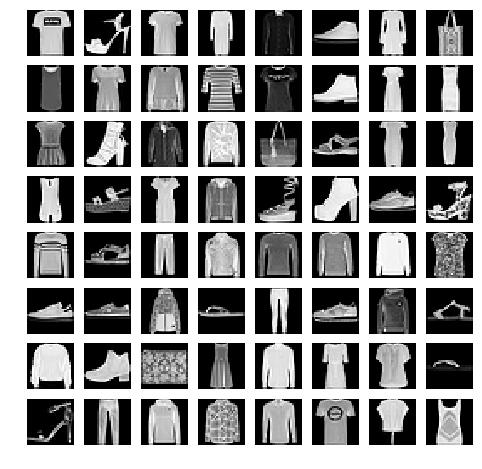

In [5]:
_=make_plots(x_train,input_data)

In [6]:
d_v, mv_in, mv_out = prepare_data(data=x_train,labels=targets_train, num_classes=num_classes)
d_t, mt_in, mt_out = prepare_data(data=x_test,labels=targets_test, num_classes=num_classes)

In [7]:
estimate_covariances(d_v,mv_in,mv_out,modes,masks,covpath,pca=pca, rerun=True)

../outputs/fmnist/covariance_estimator/cov_estimate_ML_0_masked.pkl
no zero variance pixels in data
../outputs/fmnist/covariance_estimator/cov_estimate_ML_1_masked.pkl
13 zero variance pixels
../outputs/fmnist/covariance_estimator/cov_estimate_ML_2_masked.pkl
1 zero variance pixels
../outputs/fmnist/covariance_estimator/cov_estimate_ML_3_masked.pkl
no zero variance pixels in data
../outputs/fmnist/covariance_estimator/cov_estimate_ML_4_masked.pkl
3 zero variance pixels
../outputs/fmnist/covariance_estimator/cov_estimate_ML_5_masked.pkl
3 zero variance pixels
../outputs/fmnist/covariance_estimator/cov_estimate_ML_6_masked.pkl
no zero variance pixels in data
../outputs/fmnist/covariance_estimator/cov_estimate_ML_7_masked.pkl
57 zero variance pixels
../outputs/fmnist/covariance_estimator/cov_estimate_ML_8_masked.pkl
no zero variance pixels in data
../outputs/fmnist/covariance_estimator/cov_estimate_ML_9_masked.pkl
1 zero variance pixels
../outputs/fmnist/covariance_estimator/cov_estimate_

True

In [16]:
results = perform_classification(x_test, targets_test, modes,masks, num_classes,num_comp, inpath=covpath, outpath=outpath, pca=pca, tag='test', rerun=True)

../outputs/fmnist/classification/results_test.pkl ../outputs/fmnist/classification/
ML masked 10
ML masked 15
ML masked 18
ML masked 20
ML masked 50
ML masked 200
ML masked 500
ML masked 784
ML inpainted 10
ML inpainted 15
ML inpainted 18
ML inpainted 20
ML inpainted 50
ML inpainted 200
ML inpainted 500
ML inpainted 784
LW masked 10
LW masked 15
LW masked 18
LW masked 20
LW masked 50
LW masked 200
LW masked 500
LW masked 784
LW inpainted 10
LW inpainted 15
LW inpainted 18
LW inpainted 20
LW inpainted 50
LW inpainted 200
LW inpainted 500
LW inpainted 784
NERCOME masked 10
NERCOME masked 15
NERCOME masked 18
NERCOME masked 20
NERCOME masked 50
NERCOME masked 200
NERCOME masked 500
NERCOME masked 784
NERCOME inpainted 10
NERCOME inpainted 15
NERCOME inpainted 18
NERCOME inpainted 20
NERCOME inpainted 50
NERCOME inpainted 200
NERCOME inpainted 500
NERCOME inpainted 784


In [18]:
for label in ['inpainted','masked']:
    print(np.mean(results['LW'][label]['accs'],axis=1))
    print(np.mean(results['NERCOME'][label]['accs'],axis=1))
    print(np.mean(results['ML'][label]['accs'],axis=1))

[ 0.8055  0.8131  0.8153  0.8144  0.8064  0.7612  0.7085  0.714 ]
[ 0.8055  0.8115  0.8137  0.8142  0.8033  0.7562  0.6925  0.3541]
[ 0.8056  0.8129  0.8152  0.8146  0.8063  0.7633  0.6975  0.0919]
[ 0.7579  0.7695  0.7749  0.776   0.7765  0.7497  0.7071  0.7157]
[ 0.7575  0.7689  0.7742  0.7756  0.7723  0.7414  0.6906  0.6778]
[ 0.7586  0.7698  0.7755  0.7768  0.7773  0.7498  0.6984  0.2642]


../outputs/fmnist/figures/MLvsLW_masked_test.png


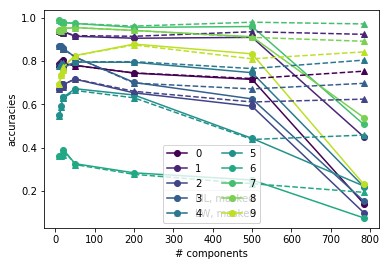

In [19]:
_=make_acc_figure(['ML','LW'],['masked'],results,num_classes,num_comp,plotpath,'MLvsLW_masked_test.png')

../outputs/fmnist/figures/LWvsNERCOME_masked_test.png


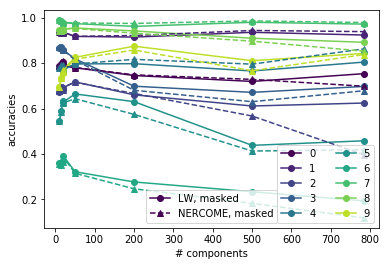

In [20]:
_=make_acc_figure(['LW','NERCOME'],['masked'],results,num_classes,num_comp,plotpath,'LWvsNERCOME_masked_test.png')

../outputs/fmnist/figures/MLvsLW_masked_test.png


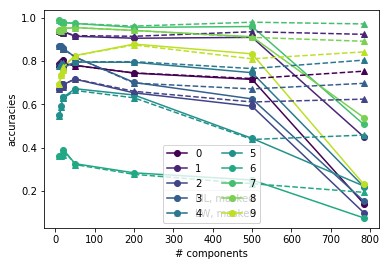

In [21]:
_=make_acc_figure(['ML','LW'],['masked'],results,num_classes,num_comp,plotpath,'MLvsLW_masked_test.png')

../outputs/fmnist/figures/MLvsLW_inpainted_test.png


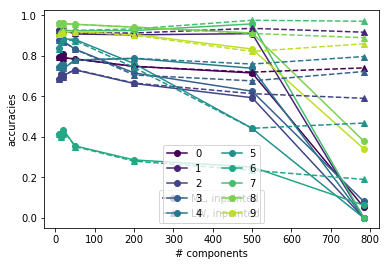

In [22]:
_=make_acc_figure(['ML','LW'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsLW_inpainted_test.png')

../outputs/mnist/figures/LWvsNERCOME_inpainted_test.png


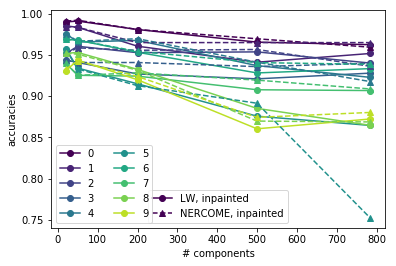

In [19]:
_=make_acc_figure(['LW','NERCOME'],['inpainted'],results,num_classes,num_comp,plotpath,'LWvsNERCOME_inpainted_test.png')

../outputs/fmnist/figures/LWvsNERCOME_masked_test.png


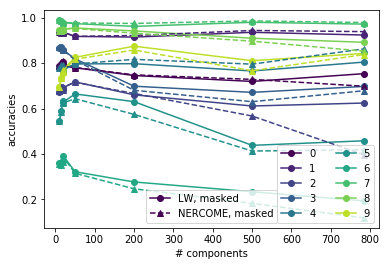

In [23]:
_=make_acc_figure(['LW','NERCOME'],['masked'],results,num_classes,num_comp,plotpath,'LWvsNERCOME_masked_test.png')